## Loan Prediction Problem Dataset


In [303]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

# 1. Data Importing

In [304]:
import pandas as pd
df= pd.read_csv (r"loan_prediction.csv")

In [305]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002965,Male,Yes,3,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
609,LP002966,Male,Yes,4,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
610,LP002967,Male,Yes,5,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y


In [306]:
df=df.drop("Loan_ID",axis=1)

In [307]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,Y
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# 2. Data Pre-Processing

Data Type and conversion

Data Manipulation

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             599 non-null    object 
 1   Married            609 non-null    object 
 2   Dependents         597 non-null    object 
 3   Education          612 non-null    object 
 4   Self_Employed      580 non-null    object 
 5   ApplicantIncome    612 non-null    int64  
 6   CoapplicantIncome  612 non-null    float64
 7   LoanAmount         590 non-null    float64
 8   Loan_Amount_Term   598 non-null    float64
 9   Credit_History     562 non-null    float64
 10  Property_Area      612 non-null    object 
 11  Loan_Status        612 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.5+ KB


In [309]:
df.Self_Employed.value_counts()

No     499
Yes     81
Name: Self_Employed, dtype: int64

In [310]:
df.Education.value_counts()

Graduate        474
Not Graduate    138
Name: Education, dtype: int64

In [311]:
df.Dependents.value_counts()

0     342
1     101
2     100
3+     50
3       1
4       1
5       1
6       1
Name: Dependents, dtype: int64

# 3. Missing Value Identify & Treatment

In [312]:
print(df.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [313]:
df1=df.dropna(axis=0)

In [314]:
df1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 4.Outlier identify & Treatment 

In [315]:
df1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:ylabel='ApplicantIncome'>

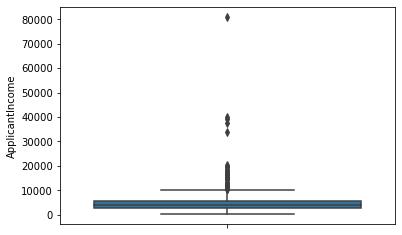

In [316]:
sns.boxplot(y=df1.ApplicantIncome)  # Single Variable

In [317]:
q1 = df1['ApplicantIncome'].quantile(0.25)
q3 = df1['ApplicantIncome'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

10200.5

In [318]:
df1['ApplicantIncome']=np.where(df1['ApplicantIncome'] > upper_limit,upper_limit,df1['ApplicantIncome']) # upper limit

<AxesSubplot:ylabel='ApplicantIncome'>

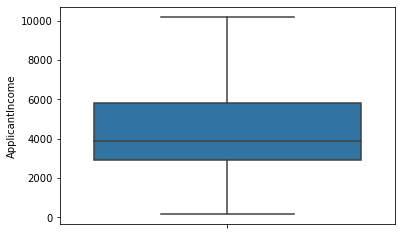

In [319]:
sns.boxplot(y=df1.ApplicantIncome)  # Single Variable

<AxesSubplot:ylabel='CoapplicantIncome'>

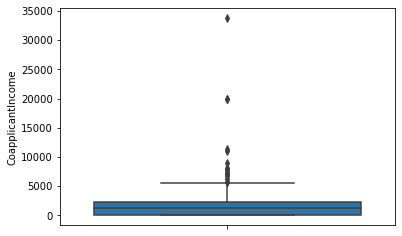

In [320]:
sns.boxplot(y=df1.CoapplicantIncome)  # Single Variable

In [321]:
q1 = df1['CoapplicantIncome'].quantile(0.25)
q3 = df1['CoapplicantIncome'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

5634.375

In [322]:
df1['CoapplicantIncome']=np.where(df1['CoapplicantIncome'] > upper_limit,upper_limit,df1['CoapplicantIncome']) # upper limit

<AxesSubplot:ylabel='CoapplicantIncome'>

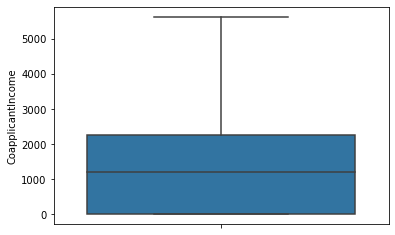

In [323]:
sns.boxplot(y=df1.CoapplicantIncome)  # Single Variable

In [324]:
df1


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,Y
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
607,Male,Yes,2,Not Graduate,No,3987.0,1411.0,157.0,360.0,1.0,Rural,Y
608,Male,Yes,3,Not Graduate,No,3987.0,1411.0,157.0,360.0,1.0,Rural,Y
609,Male,Yes,4,Not Graduate,No,3987.0,1411.0,157.0,360.0,1.0,Rural,Y
610,Male,Yes,5,Not Graduate,No,3987.0,1411.0,157.0,360.0,1.0,Rural,Y


<AxesSubplot:ylabel='LoanAmount'>

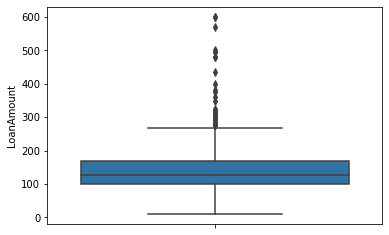

In [325]:
sns.boxplot(y=df1.LoanAmount)  # Single Variable

In [326]:
q1 = df1['LoanAmount'].quantile(0.25)
q3 = df1['LoanAmount'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

273.75

In [327]:
df1['LoanAmount']=np.where(df1['LoanAmount'] > upper_limit,upper_limit,df1['LoanAmount']) # upper limit

<AxesSubplot:ylabel='LoanAmount'>

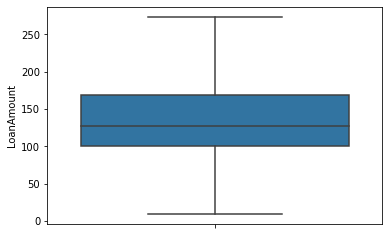

In [328]:
sns.boxplot(y=df1.LoanAmount)  # Single Variable

<AxesSubplot:ylabel='Loan_Amount_Term'>

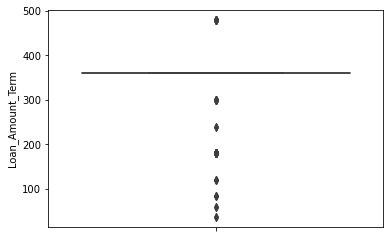

In [329]:
sns.boxplot(y=df1.Loan_Amount_Term)  # Single Variable

In [330]:
q1 = df1['Loan_Amount_Term'].quantile(0.25)
q3 = df1['Loan_Amount_Term'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

360.0

In [331]:
df1['Loan_Amount_Term']=np.where(df1['Loan_Amount_Term'] > upper_limit,upper_limit,df1['Loan_Amount_Term']) # upper limit

<AxesSubplot:ylabel='Loan_Amount_Term'>

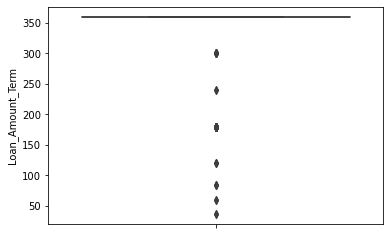

In [332]:
sns.boxplot(y=df1.Loan_Amount_Term)  # Single Variable

In [333]:
q1 = df1['Loan_Amount_Term'].quantile(0.25)
q3 = df1['Loan_Amount_Term'].quantile(0.75)
iqr = q3-q1 #Interquartile range
lower_limit = q1-1.5*iqr #acceptable range
#upper_limit = q3+1.5*iqr #acceptable range
lower_limit

360.0

In [334]:
df1['Loan_Amount_Term']=np.where(df1['Loan_Amount_Term'] < lower_limit,lower_limit,df1['Loan_Amount_Term']) # upper limit

<AxesSubplot:ylabel='Loan_Amount_Term'>

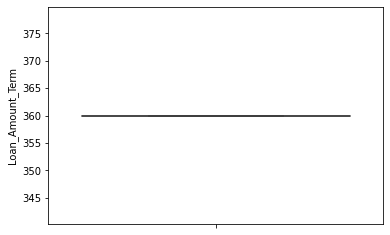

In [335]:
sns.boxplot(y=df1.Loan_Amount_Term)  # Single Variable

In [336]:
df1


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,Y
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
607,Male,Yes,2,Not Graduate,No,3987.0,1411.0,157.0,360.0,1.0,Rural,Y
608,Male,Yes,3,Not Graduate,No,3987.0,1411.0,157.0,360.0,1.0,Rural,Y
609,Male,Yes,4,Not Graduate,No,3987.0,1411.0,157.0,360.0,1.0,Rural,Y
610,Male,Yes,5,Not Graduate,No,3987.0,1411.0,157.0,360.0,1.0,Rural,Y


<AxesSubplot:ylabel='Credit_History'>

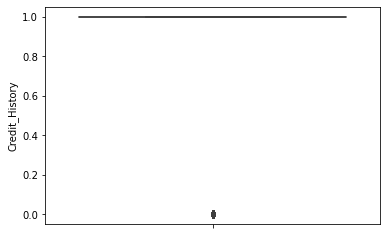

In [337]:
sns.boxplot(y=df1.Credit_History)  # Single Variable

In [338]:
q1 = df1['Credit_History'].quantile(0.25)
q3 = df1['Credit_History'].quantile(0.75)
iqr = q3-q1 #Interquartile range
lower_limit = q1-1.5*iqr #acceptable range
#upper_limit = q3+1.5*iqr #acceptable range
lower_limit

1.0

In [339]:
df1['Credit_History']=np.where(df1['Credit_History'] < lower_limit,lower_limit,df1['Credit_History']) # upper limit

<AxesSubplot:ylabel='Credit_History'>

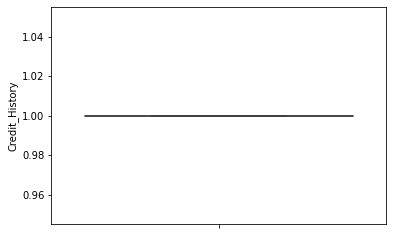

In [340]:
sns.boxplot(y=df1.Credit_History)  # Single Variable

# Data Visualization

In [341]:
import plotly.express as px

fig = px.pie(df1,names='Loan_Status',color='Loan_Status',
             color_discrete_map={'Y':'red',
                                 'N':'green'})
fig.show()

# 5.Labeling the data 

In [342]:
df1.select_dtypes(include=[np.number]).columns.tolist()

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [343]:
 # Numeric columns
df1_num = df1[df1.select_dtypes(include=[np.number]).columns.tolist()]
df1_num.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0


In [344]:
df1_dummies = df1[df1.select_dtypes(include=['object']).columns.tolist()]
df1_dummies.head(3)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,Rural,Y
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y


In [345]:
from sklearn.preprocessing import LabelEncoder
df1_dummies=df1_dummies.apply(LabelEncoder().fit_transform)
df1_dummies.head(3)
# label in ascending order

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,1,1,1,0,0,0,1
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1


In [346]:
df1 = pd.concat([df1_num, df1_dummies],axis=1)
df1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,4583.0,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,1
2,3000.0,0.0,66.0,360.0,1.0,1,1,0,0,1,2,1
3,2583.0,2358.0,120.0,360.0,1.0,1,1,0,1,0,2,1
4,6000.0,0.0,141.0,360.0,1.0,1,0,0,0,0,2,1
5,5417.0,4196.0,267.0,360.0,1.0,1,1,2,0,1,2,1


# Data Partition 

In [347]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = df1.drop('Loan_Status', axis = 1)
Y = df1[['Loan_Status']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)

In [348]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=20, # make 20 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=30,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=50,
                       min_samples_split=30, n_estimators=20)

# Importance Features

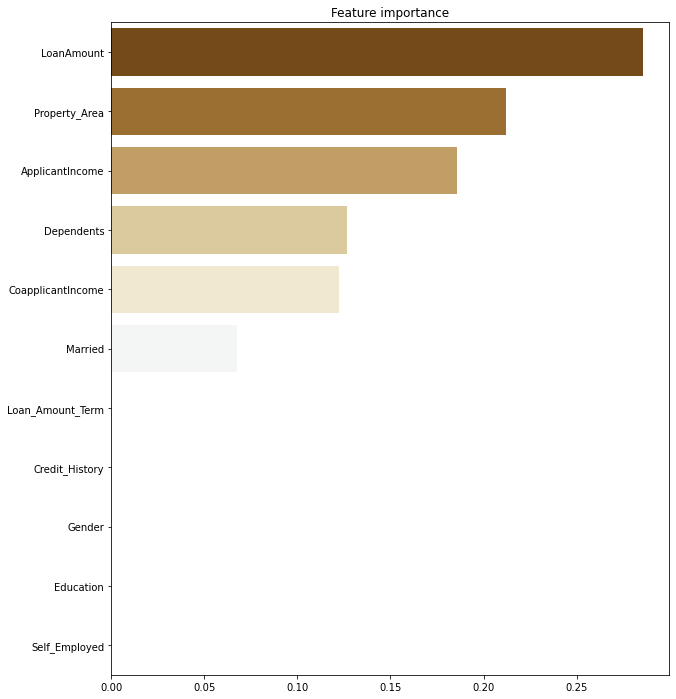

In [349]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')


# Random Forest Visualization

In [350]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

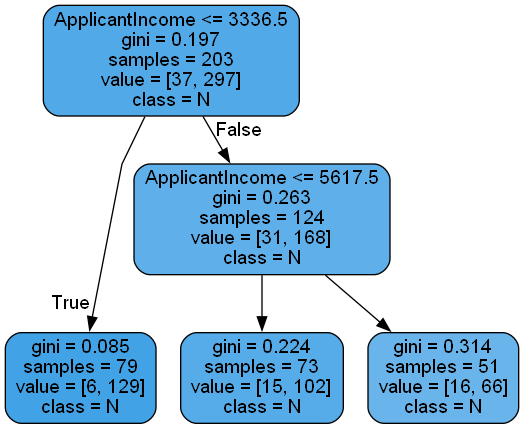

In [351]:
tree = Model.estimators_[1]  # specify the tree number   
Loan_Status=['Y','N'] 
# Export the image to a dot file
feature_list = list(X.columns)  # all variable name
export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=Loan_Status,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

# Step 6 : Predictions on Train Dataset

In [352]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
136,4583.0,0.000,84.0,360.0,1.0,0,1,0,0,0,0,1
201,4923.0,0.000,166.0,360.0,1.0,1,0,2,0,0,1,1
516,2031.0,1632.000,113.0,360.0,1.0,0,1,2,0,0,1,1
46,5649.0,0.000,44.0,360.0,1.0,1,1,1,0,0,2,1
180,6400.0,5634.375,180.0,360.0,1.0,1,1,1,0,0,2,1


In [353]:
train['Predicted']=Model.predict(X_train)
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Predicted
136,4583.0,0.000,84.0,360.0,1.0,0,1,0,0,0,0,1,1
201,4923.0,0.000,166.0,360.0,1.0,1,0,2,0,0,1,1,1
516,2031.0,1632.000,113.0,360.0,1.0,0,1,2,0,0,1,1,1
46,5649.0,0.000,44.0,360.0,1.0,1,1,1,0,0,2,1,1
180,6400.0,5634.375,180.0,360.0,1.0,1,1,1,0,0,2,1,1


# Step 7 : Model Performance Metrics

In [354]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Loan_Status'], train['Predicted'])
print(confusion_matrix)

[[  0  33]
 [  0 301]]


In [355]:
Accuracy_Train=((301+0)/(334)*100)
print(Accuracy_Train)

90.11976047904191


In [356]:
from sklearn.metrics import classification_report
print(classification_report(train['Loan_Status'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.90      1.00      0.95       301

    accuracy                           0.90       334
   macro avg       0.45      0.50      0.47       334
weighted avg       0.81      0.90      0.85       334



# Step 8 : Predictions on Test Dataset


In [357]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
302,5000.0,0.0,132.0,360.0,1.0,0,0,0,0,0,0,1
414,2149.0,3237.0,178.0,360.0,1.0,0,1,0,1,0,1,0
418,1025.0,2773.0,112.0,360.0,1.0,1,1,0,0,0,0,1
359,5167.0,3167.0,200.0,360.0,1.0,1,1,4,0,0,1,1
485,1958.0,2436.0,131.0,360.0,1.0,1,1,1,1,0,0,1


In [358]:
test['Predicted']=Model.predict(X_test)
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,Predicted
302,5000.0,0.0,132.0,360.0,1.0,0,0,0,0,0,0,1,1
414,2149.0,3237.0,178.0,360.0,1.0,0,1,0,1,0,1,0,1
418,1025.0,2773.0,112.0,360.0,1.0,1,1,0,0,0,0,1,1
359,5167.0,3167.0,200.0,360.0,1.0,1,1,4,0,0,1,1,1
485,1958.0,2436.0,131.0,360.0,1.0,1,1,1,1,0,0,1,1


# Step 9 : Model Performance Metrics on Test data 


In [359]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Loan_Status'])
print(confusion_matrix)

[[  0   0]
 [ 16 128]]


In [360]:
Accuracy_test=((128+0)/(144)*100)
Accuracy_test

88.88888888888889

In [361]:
from sklearn.metrics import classification_report
print(classification_report(test['Loan_Status'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.89      1.00      0.94       128

    accuracy                           0.89       144
   macro avg       0.44      0.50      0.47       144
weighted avg       0.79      0.89      0.84       144



# Finish